# Рекомендательная система в образовании
## исследование визуализации данных и эффективности машинного обучения
#### Цель этого проекта состояла в том, чтобы изучить ряд алгоритмов машинного обучения, способных адаптироваться к категориальным данным и попытаться предсказать успеваемость учащихся. Некоторые части нашей проблемы, которые делают ее уникальной: Есть 3 класса, и большинство наших данных являются категориальными данными, а не чисто количественными. Наша цель состояла в том, чтобы выполнить некоторую визуализацию исходных данных и определить, какой классификатор лучше всего обрабатывает эти данные.

In [77]:
import pandas as pd    # библиотека для работы с данными
import numpy as np     # библиотека для произовадения математических вычислений
import seaborn as sns  # библиотека для построения графиков
import matplotlib.pyplot as plt # необходимый инструмент для построения графиков
import warnings
# sklearn — это большой источник предварительно написанных и в основном оптимизированных алгоритмов машинного обучения.
from sklearn import preprocessing, svm   
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')


data = pd.read_csv('/Users/superponny/Downloads/xAPI-Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [78]:
data.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


## Data Fields
<table>
    <tr>
    <th>Data Field</th>
    <th>Description</th>
    </tr>
    <tr>
    <th>gender</th>
    <td>The student's gender.</td>
    </tr>
    <tr>
    <th>NationalITy</th>
    <td>The student's nationality.</td>
    </tr>
    <tr>
    <th>PlaceofBirth</th>
    <td>The student's country of birth.</td>
    </tr>
    <tr>
    <th>StageID</th>
    <td>Educational level student belongs to (Elementary, Middle, or High School).</td>
    </tr>
    <tr>
    <th>GradeID</th>
    <td>The grade year of the student.</td>
    </tr>
    <tr>
    <th>SectionID</th>
    <td>The classroom the student is in.</td>
    </tr>
    <tr>
    <th>Topic</th>
    <td>The topic of the course.</td>
    </tr>
    <tr>
    <th>Semester</th>
    <td>The semester of the school year.   (F for Fall, S for Spring)</td>
    </tr>
    <tr>
    <th>Relation</th>
    <td>The parent responsible for student.</td>
    </tr>
    <tr>
    <th>raisedhands</th>
    <td>How many times the student raises his/her hand on classroom</td>
    </tr>
    <tr>
    <th>VisITedResources</th>
    <td>How many times the student visits a course content</td>
    </tr>
    <tr>
    <th>AnnouncementsView</th>
    <td>How many times the student checks the new announcements</td>
    </tr>
    <tr>
    <th>Discussion</th>
    <td>How many times the student participate on discussion groups</td>
    </tr>
    <tr>
    <th>ParentAnsweringSurvey</th>
    <td>Parent answered the surveys which are provided from school or not</td>
    </tr>
    <tr>
    <th>ParentschoolSatisfaction</th>
    <td>Whether or not the parents were satisfied. "Good" or "Bad". Oddly this was not null for parents who did not answer the survey. It is unclear how this value was filled in.</td>
    </tr>
    <tr>
    <th>StudentAbsenceDays</th>
    <td>Whether or not a student was absent for more than 7 days</td>
    </tr>
    <tr>
    <th>Class</th>
    <th>Our classification field. 'L' is for students who got a failing percentage (Less than 69%), 'M' for students who got a low passing grade (Between 70% and 89%), and 'H' for students who achieved high marks in their course (90% to 100%)</th>
    </tr>
    </table>
    
## Предварительная визуализация данных
#### Наша цель  визуализацией данных — получить представление о форме наших данных и посмотреть, сможем ли мы легко идентифицировать любые возможные выбросы. Поскольку это в первую очередь категориальные данные, мы в основном смотрим на графики полей данных и наших классов. Мы также проверяем, не являются ли какие-либо из наших данных неясными или избыточными.

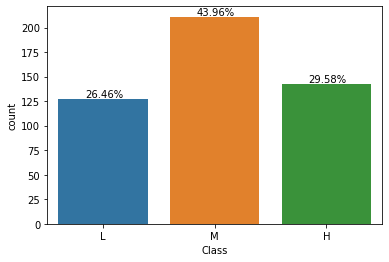

In [79]:
ax = sns.countplot(x='Class', data=data, order=['L', 'M', 'H'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

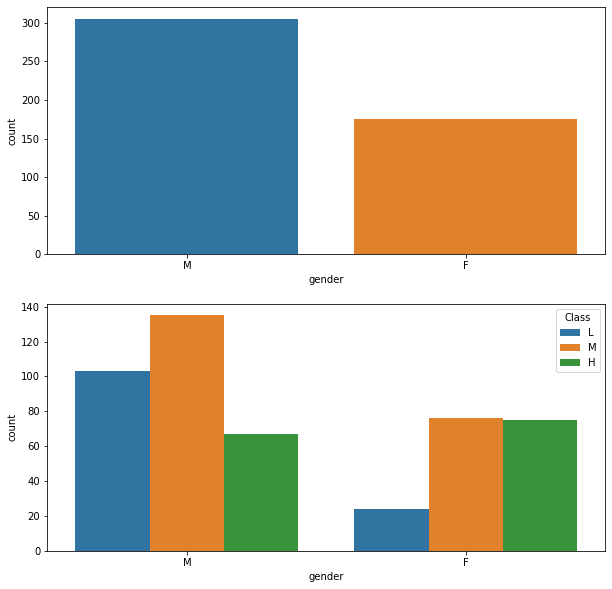

In [80]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='gender', data=data, order=['M','F'], ax=axarr[0])
sns.countplot(x='gender', hue='Class', data=data, order=['M', 'F'],hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

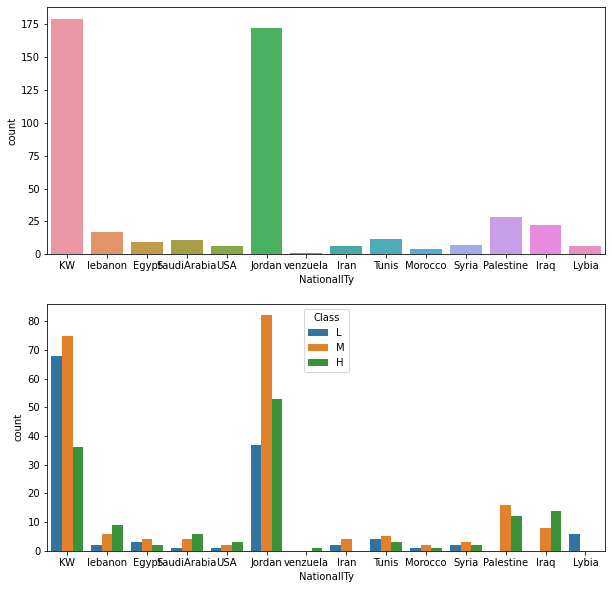

In [81]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='NationalITy', data=data, ax=axarr[0])
sns.countplot(x='NationalITy', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

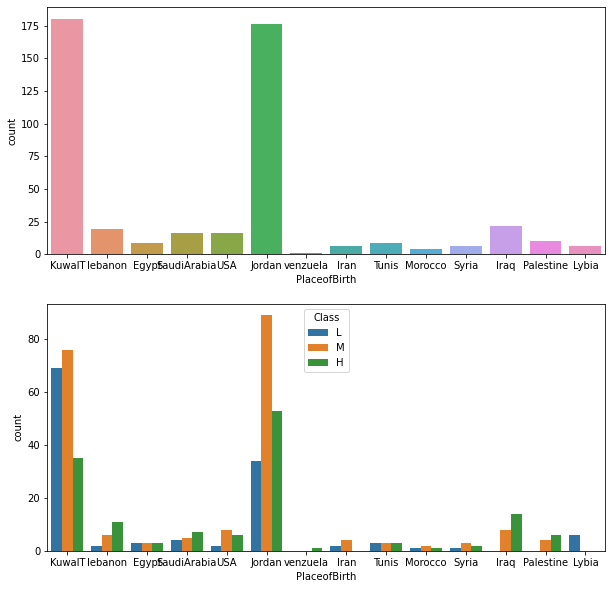

In [82]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='PlaceofBirth', data=data, ax=axarr[0])
sns.countplot(x='PlaceofBirth', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

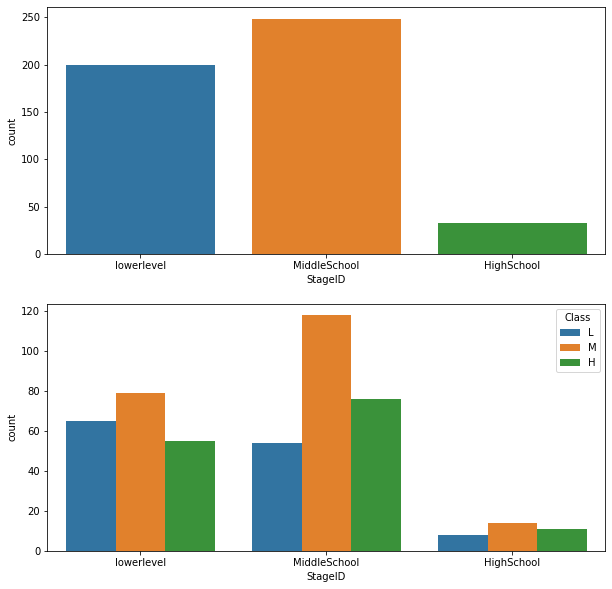

In [83]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='StageID', data=data, ax=axarr[0])
sns.countplot(x='StageID', hue='Class', data=data, hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

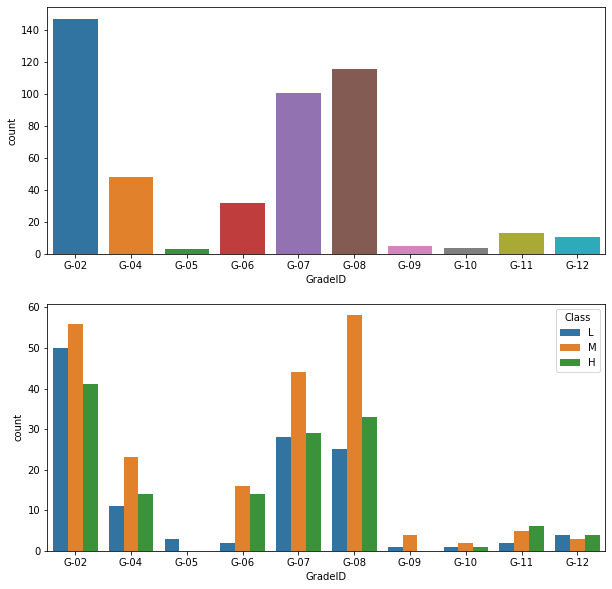

In [84]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='GradeID', data=data, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], ax=axarr[0])
sns.countplot(x='GradeID', hue='Class', data=data, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

#### Глядя на эти результаты, видно, что в 5, 9 и 10 классах очень мало подсчетов. Кроме того, ни один ученик 5-го класса не сдает экзамены, а ученики 9-го класса не получают высоких оценок. Может быть, это аутсайдеры?

In [85]:
#Students in Grade 5
data.loc[data['GradeID'] == 'G-05']

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
33,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,8,22,9,40,No,Bad,Above-7,L
46,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,7,10,1,30,No,Bad,Above-7,L
60,F,Jordan,Jordan,lowerlevel,G-05,A,English,F,Mum,21,10,28,20,No,Good,Above-7,L


In [86]:
#Students in Grade 9
data.loc[data['GradeID'] == 'G-09']

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
42,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,10,12,7,33,Yes,Good,Above-7,L
43,F,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,30,35,28,90,Yes,Good,Under-7,M
44,F,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,33,33,30,90,No,Bad,Under-7,M
76,M,Iran,Iran,HighSchool,G-09,A,IT,F,Mum,15,70,37,44,Yes,Good,Under-7,M
77,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,20,80,33,33,Yes,Good,Under-7,M


#### Глядя на сами строки, учащиеся 5-го класса, похоже, имеют данные, аналогичные всем остальным учащимся, которые не сдали экзамен (пропустил более 7 дней, низкие числовые значения, отсутствие школьного опроса и т. д.).
#### И опять же, после изучения данных по ученикам 9-х классов это также похоже на то, что мы, вероятно, ожидаем для каждой категории.
#### Мы рассмотрим их немного позже.

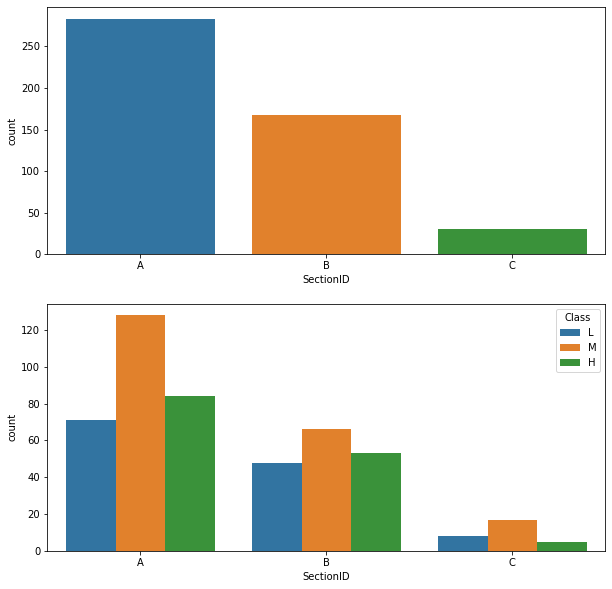

In [87]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='SectionID', data=data, order=['A', 'B', 'C'], ax = axarr[0])
sns.countplot(x='SectionID', hue='Class', data=data, order=['A', 'B', 'C'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

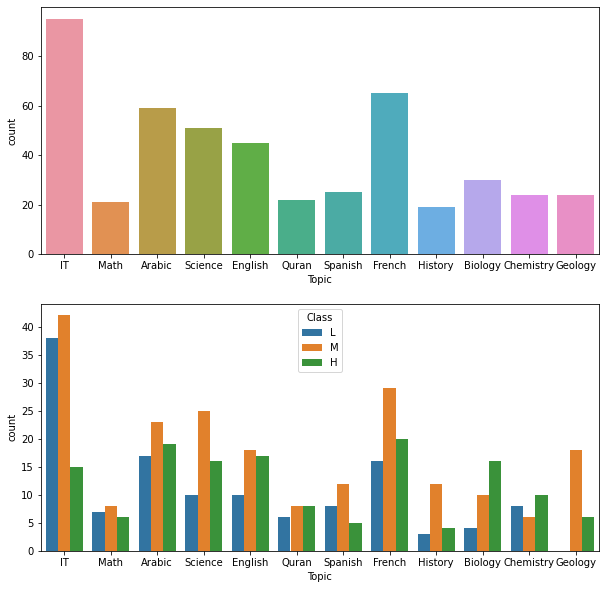

In [88]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax = axarr[0])
sns.countplot(x='Topic', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

#### An interesting thing to note is that no Geology students fail. We will look into this in a second.

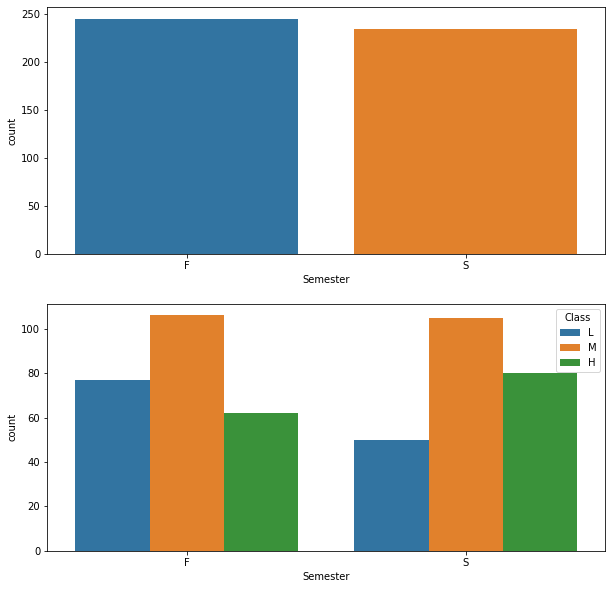

In [89]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Semester', data=data, ax = axarr[0])
sns.countplot(x='Semester', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

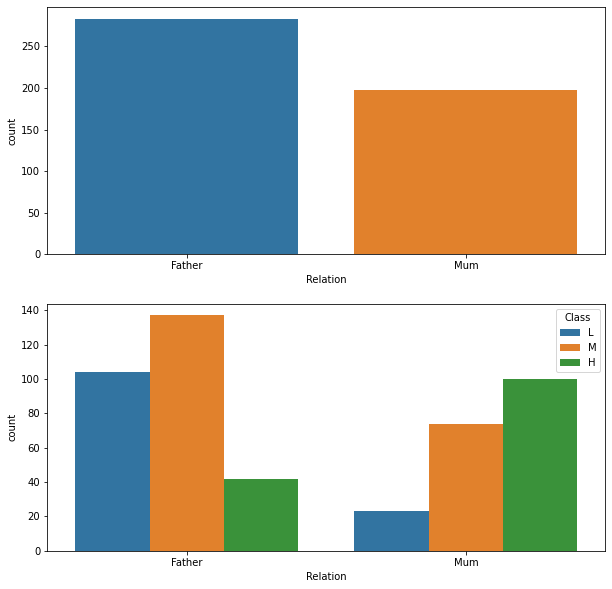

In [90]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Relation', data=data, ax = axarr[0])
sns.countplot(x='Relation', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

#### Глядя на это, кажется, что существует корреляция между учащимися, у которых матери являются их основным опекуном, и учащимися, у которых меньше шансов потерпеть неудачу.

### Далее мы смотрим на наши измеримые данные. Зарегистрированное количество раз, когда учащийся: поднимал руку, посещал ресурсы курса, просматривал страницу объявлений онлайн-курса и посещал страницы обсуждения. Для облегчения визуального сравнения мы наносим их вместе:

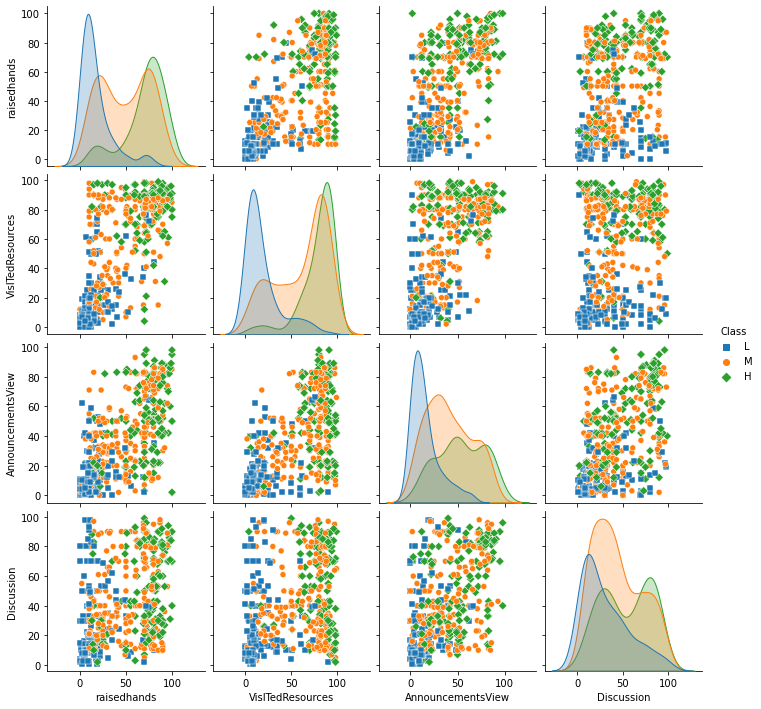

In [91]:
sns.pairplot(data, hue="Class", diag_kind="kde", hue_order = ['L', 'M', 'H'], markers=["o", "s", "D"])
plt.show()

In [92]:
data.groupby('Topic').median()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Topic,,,,
Arabic,32.0,65.0,41.0,38.0
Biology,78.5,88.5,54.0,47.0
Chemistry,79.0,84.5,47.0,30.5
English,55.0,50.0,33.0,36.0
French,35.0,80.0,23.0,21.0
Geology,80.0,82.0,68.5,60.5
History,69.0,84.0,72.0,65.0
IT,20.0,25.0,10.0,40.0
Math,28.0,15.0,19.0,40.0


#### Здесь мы можем увидеть часть вероятной причины, по которой все студенты-геологи сдали экзамен. У них гораздо более высокие средние числовые значения, чем у большинства других курсов.

In [93]:
data.groupby('GradeID').median()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
GradeID,,,,
G-02,27.0,60.0,21.0,30.0
G-04,45.5,50.0,33.0,43.5
G-05,8.0,10.0,9.0,30.0
G-06,72.0,61.0,49.0,36.5
G-07,50.0,71.0,33.0,50.0
G-08,70.5,77.0,45.5,40.5
G-09,20.0,35.0,30.0,44.0
G-10,33.5,41.5,24.0,26.0
G-11,70.0,63.0,50.0,49.0


#### Here, looking at the median data again we can see part of the likely reason why the 5th and 9th grade students performed as they did as well.

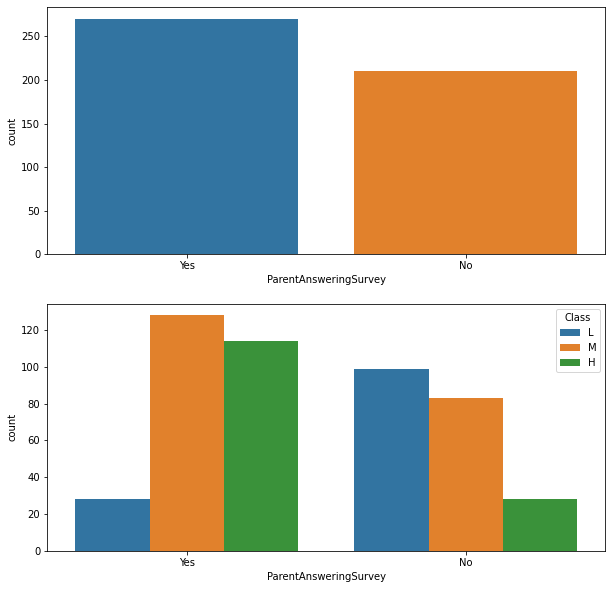

In [94]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='ParentAnsweringSurvey', data=data, order=['Yes', 'No'], ax = axarr[0])
sns.countplot(x='ParentAnsweringSurvey', hue='Class', data=data, order=['Yes', 'No'], hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

#### Глядя на этот график, возникает ряд вопросов, касающихся причинно-следственной связи. Были ли родители более склонны отвечать на вопросы анкеты, потому что их учащийся хорошо учился, или на ответы повлияла успеваемость учащегося? К сожалению, как и во многих случаях, это один из вопросов, возникающих при просмотре визуализаций данных, на который у нас просто нет доступа к данным.

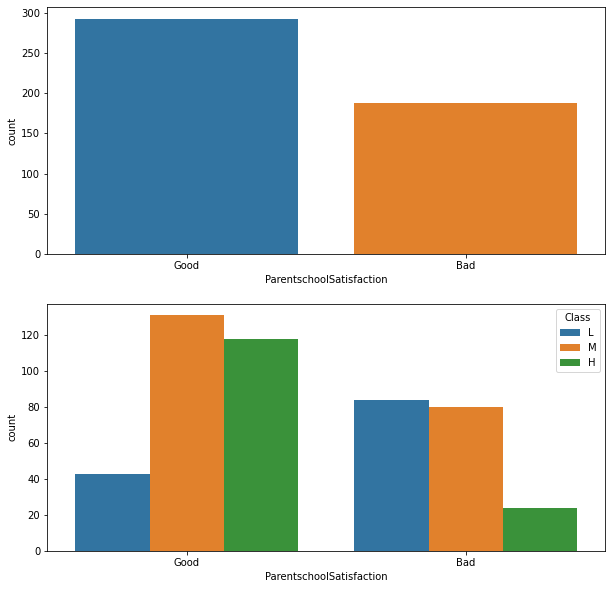

In [95]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='ParentschoolSatisfaction', data=data, order=['Good', 'Bad'], ax = axarr[0])
sns.countplot(x='ParentschoolSatisfaction', hue='Class', data=data, order=['Good', 'Bad'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

#### Такие же вопросы о причинно-следственной связи возникают при рассмотрении результата удовлетворенности родителей школой.

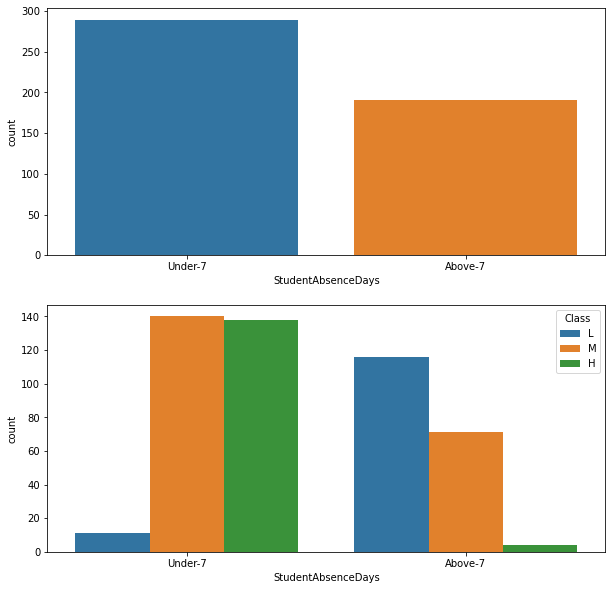

In [96]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='StudentAbsenceDays', data=data, order=['Under-7', 'Above-7'], ax = axarr[0])
sns.countplot(x='StudentAbsenceDays', hue='Class', data=data, order=['Under-7', 'Above-7'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

#### StudentAbsenceDays имеет сильную корреляцию с нашей переменной класса. Очень немногие студенты, пропустившие более 7 дней, смогли получить высокие оценки, и очень немногие студенты, пропустившие менее 7 дней, провалили курс.

## Предварительная обработка данных
#### Наша цель с предварительной обработкой состоит в том, чтобы изменить наши числовые поля, которые имеют такое значение, как GradeID, на чисто числовое значение таким образом, чтобы мы сохраняли это расстояние корректным образом. Кроме того, мы хотим назначить нашим трем классам числовые результаты с сохраненным расстоянием. Есть несколько способов сделать это. Мы выбрали настройку L = -1, M = 0 и H = 1. Кроме того, вы можете установить для каждого среднее значение своей категории по шкале 100% (L = 34,5, M = 79,5 и H = 95). . Мы решили сохранить расстояние между категориальными значениями. Кроме того, мы решили масштабировать наши числовые поля, чтобы они были более значимыми при сравнении друг с другом. Для этого мы использовали встроенную в scikit Learn возможность масштабирования предварительной обработки.

In [97]:
gradeID_dict = {"G-01" : 1,
                "G-02" : 2,
                "G-03" : 3,
                "G-04" : 4,
                "G-05" : 5,
                "G-06" : 6,
                "G-07" : 7,
                "G-08" : 8,
                "G-09" : 9,
                "G-10" : 10,
                "G-11" : 11,
                "G-12" : 12}

data = data.replace({"GradeID" : gradeID_dict})

class_dict = {"L" : -1,
                "M" : 0,
                "H" : 1}
data = data.replace({"Class" : class_dict})

data["GradeID"] = preprocessing.scale(data["GradeID"])
data["raisedhands"] = preprocessing.scale(data["raisedhands"])
data["VisITedResources"] = preprocessing.scale(data["VisITedResources"])
data["AnnouncementsView"] = preprocessing.scale(data["AnnouncementsView"])
data["Discussion"] = preprocessing.scale(data["Discussion"])

data = pd.get_dummies(data, columns=["gender",
                                     "NationalITy",
                                     "PlaceofBirth",
                                     "SectionID",
                                     "StageID",
                                     "Topic",
                                     "Semester",
                                     "Relation",
                                     "ParentAnsweringSurvey",
                                     "ParentschoolSatisfaction",
                                     "StudentAbsenceDays"])

data.head()

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,-0.563838,-1.033429,-1.174075,-1.351167,-0.843326,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
1,-0.563838,-0.870813,-1.053029,-1.313549,-0.662225,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
2,-0.563838,-1.196046,-1.446426,-1.426401,-0.481125,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,-0.563838,-0.545579,-0.901723,-1.238315,-0.300024,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,-0.563838,-0.220346,-0.145191,-0.974994,0.243279,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0


#### Одним из основных методов обработки категориальных данных является преобразование полей с большим количеством значений в бинарные «фиктивные» переменные. Это гарантирует, что наши алгоритмы не интерпретируют расстояние в столбце со многими возможными категориями. В нашем случае хорошим примером этого является наша колонка «Национальность». Он имеет 16 возможных значений, и простое преобразование значений в число означало бы некоторое расстояние между одним и другим, что в данном случае не имеет смысла. Как видите, мы переходим от 17 столбцов (16 переменных и 1 класс) к 64 (63 переменных и 1 класс). Создание подобных фиктивных переменных может определенно увеличить сложность проблемы, но большинство из них очень мало заполнены. Что становится важным с методами машинного обучения, которые мы используем.

#### Теперь, когда все немного обработано, мы можем взглянуть на корреляции между полями.

In [98]:
corr = data.corr()
corr.iloc[[5]]

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
Class,0.071654,0.646298,0.677094,0.52737,0.308183,1.0,0.26349,-0.26349,-0.02631,-0.054841,...,-0.126239,0.126239,-0.401142,0.401142,-0.435495,0.435495,-0.375901,0.375901,-0.671312,0.671312


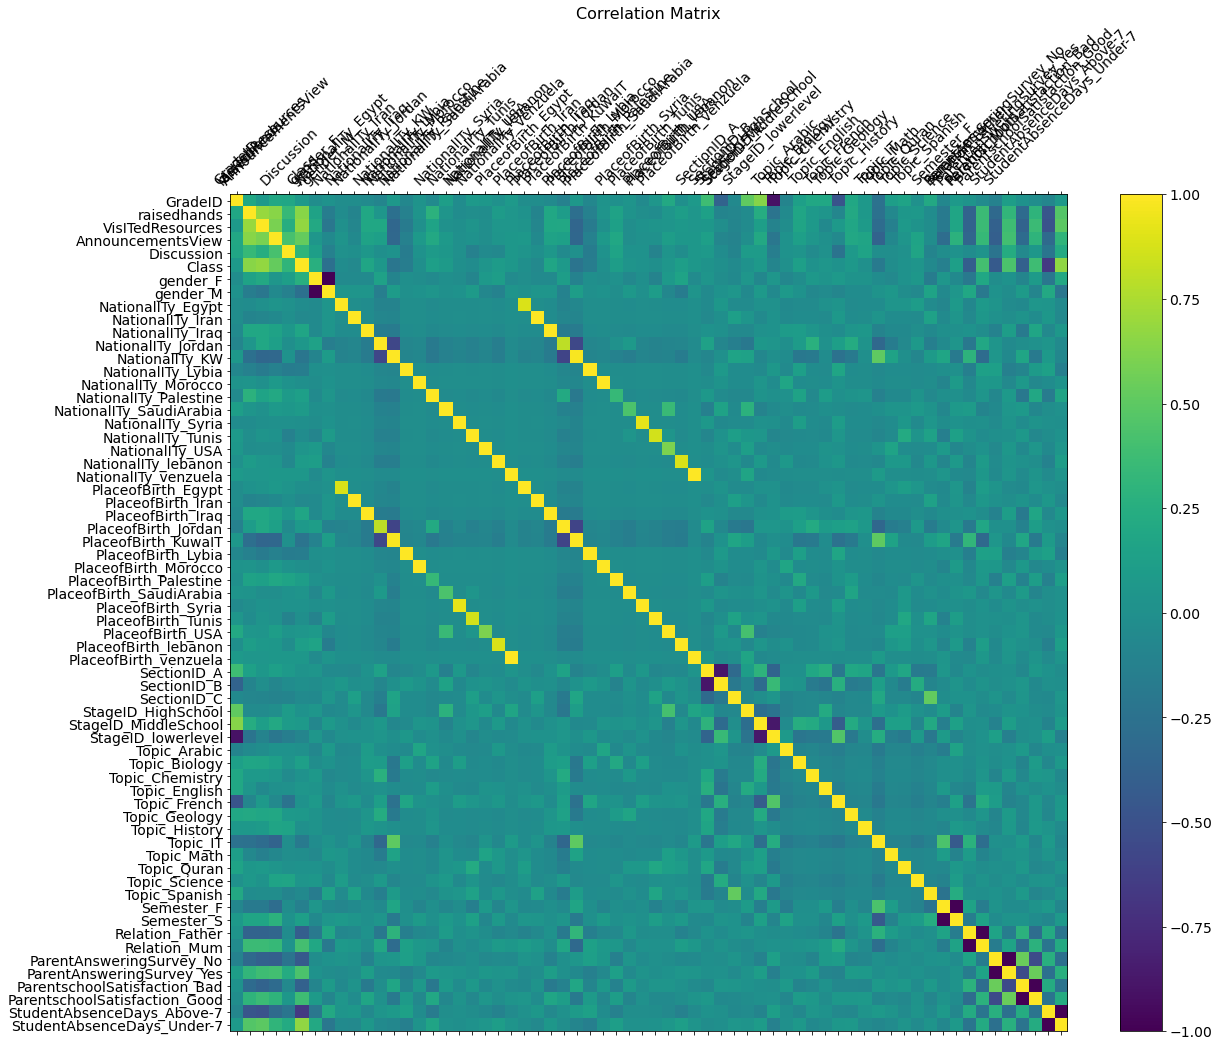

In [103]:
df = data
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Строка корреляционной матрицы, рассматривающая только наши классы и атрибуты, имеющие к ним корреляцию. Как мы видим, StudentAbsenceDays имеет сильную корреляцию, как мы и ожидали, как и другие столбцы. Важно отметить, что значения столбцов, которые были преобразованы в простые двоичные фиктивные пары, всегда будут иметь «равную» корреляцию. (например, пол_Ж и пол_М)
#### Список наших 8 полей с самой высокой корреляцией: посещенные ресурсы, дни отсутствия учащихся, поднятые руки, просмотры объявлений, ответы на опросы, отношения, удовлетворенность родителей, обсуждение, пол и семестр.

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Определение конвейера
pipe = Pipeline([('classifier', None)])
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, lambda x: [l for l in data if l != "Class"]],data.loc[:, lambda x: "Class"] , test_size=0.3, random_state=42)

# Определение сетки параметров для каждой модели
param_grids = [
    {'classifier': [SVC()], 'classifier__kernel': ['sigmoid', 'linear', 'poly', 'rbf'], 'classifier__C': [0.1, 1, 10], 'classifier__gamma': ['scale', 'auto', 0.1, 1, 10], 'classifier__class_weight': [None, 'balanced']},
    {'classifier': [RandomForestClassifier()], 'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [3, 4, 5, 6, 10, None], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4, 5]},
    {'classifier': [Perceptron()], 'classifier__alpha': [0.001, 0.01, 0.1],  'classifier__penalty': [None, 'l1', 'l2', 'elasticnet']},
    {'classifier': [GradientBoostingClassifier()], 'classifier__n_estimators': [50, 100, 150], 'classifier__learning_rate': [0.01, 0.1, 1], 'classifier__max_depth': [3, 5, 10], 'classifier__min_samples_split': [2, 5, 10],  'classifier__subsample': [0.5, 0.8, 1],'classifier__max_features': ['sqrt', 'log2', None],},
    {'classifier': [LogisticRegression()], 'classifier__penalty': ['l1', 'l2'], 'classifier__C': [0.1, 1, 10], 'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'classifier__max_iter': [100, 500, 1000] }
]

# Определение метрики оценки качества модели
metric = 'f1_macro'

# Определение объекта GridSearchCV для каждой модели
svm_grid = GridSearchCV(pipe, param_grids[0], cv=5, scoring=metric)
rf_grid = GridSearchCV(pipe, param_grids[1], cv=5, scoring=metric)
perceptron_grid = GridSearchCV(pipe, param_grids[2], cv=5, scoring=metric)
gboost_grid = GridSearchCV(pipe, param_grids[3], cv=5, scoring=metric)
lr_grid = GridSearchCV(pipe, param_grids[4], cv=5, scoring=metric)

# Определение списка моделей
models = [
    ('SVM', svm_grid),
    ('Random Forest', rf_grid),
    ('Perceptron', perceptron_grid),
    ('Gradient Boosting', gboost_grid),
    ('Logistic Regression', lr_grid)
]

# Поочередное обучение каждой модели и вывод отчета о классификации для лучшей модели
best_score = 0
best_model = None
for name, model in models:
    model.fit(X_train, y_train)
    
    print(f'{name}:\n{classification_report(y_test, model.predict(X_test))}\n')
    print(model.best_estimator_)
    print(model.best_params_)
    print(model.best_score_)
    print(f"Confusion Matrix:\n{confusion_matrix(y_test,  model.predict(X_test))}")
    print(precision_score(y_test, y_pred))
    print(precision_score(y_test,   model.predict(X_test)))
    print(recall_score(y_test,   model.predict(X_test)))
    if model.best_score_ > best_score:
        best_score = model.best_score_
        best_model = model

print(f'Лучшая модель: {best_model.best_estimator_}')

SVM:
              precision    recall  f1-score   support

          -1       0.85      0.89      0.87        45
           0       0.75      0.79      0.77        68
           1       0.72      0.58      0.64        31

    accuracy                           0.78       144
   macro avg       0.77      0.75      0.76       144
weighted avg       0.78      0.78      0.77       144


Pipeline(steps=[('classifier', SVC(C=1, gamma=0.1))])
{'classifier': SVC(C=1, gamma=0.1), 'classifier__C': 1, 'classifier__class_weight': None, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}
0.7660353884384297
Confusion Matrix:
[[40  5  0]
 [ 7 54  7]
 [ 0 13 18]]
Random Forest:
              precision    recall  f1-score   support

          -1       0.87      0.87      0.87        45
           0       0.76      0.82      0.79        68
           1       0.76      0.61      0.68        31

    accuracy                           0.79       144
   macro avg       0.79      0.77      0.78       144